In [33]:
# Part 1: Including the library
import pandas as pd
from citipy import citipy
import numpy as np
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [34]:
#Part 2: Generating a list for latitudes and longitudes

latitude = []
longitude = []
for each_lat in np.random.randint(-90,90,2000):
    latitude.append(each_lat)
for each_lon in np.random.randint(-180,180,2000):
    longitude.append(each_lon)


In [35]:
#Part 3: Create a variable and store the generated values of longitude and latitude

latitude_and_Longitude = tuple(zip(latitude,longitude))


In [36]:
#Part 4: Use the “citypy” library to find the nearest city for all Longitudes and latitudes

cities = []
country = []
for lat,lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)    
    cityName = city.city_name    
    cities.append(cityName)    
    country.append(city.country_code)

#Part 5: Print how many different cities were generated

print('The above script has generated {} different cities using random numbers.'.format(len(set(cities))))




The above script has generated 757 different cities using random numbers.


In [37]:

#Part 6: Create a data frame to store all the cities and countries generated using citypy and add additional blank columns to store information from OpenWeatherMap API

df_countries = pd.DataFrame({'Cities': cities, 'Country': country})
df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''

#Part 7: Delete the duplicate cities

df_countries = df_countries.drop_duplicates(subset=['Cities'],keep='first')
df_countries

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,avarua,ck,,,,,,
2,college,us,,,,,,
3,hithadhoo,mv,,,,,,
4,nikolskoye,ru,,,,,,
5,kapaa,us,,,,,,
6,arroio grande,br,,,,,,
7,atuona,pf,,,,,,
8,bambous virieux,mu,,,,,,
9,cayenne,gf,,,,,,
10,tsihombe,mg,,,,,,


In [38]:
#Part 8: Access data using API Key and run a loop for filling all values in the blank columns 

api_key = "efd03ad6f73fe1de45aecfe6961c2216"
for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']   

    api_url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,api_key)   

    country_info = requests.get(api_url).json()
    print(api_url)
    try:
        df_countries.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        df_countries.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')



http://api.openweathermap.org/data/2.5/forecast?q=avarua,ck&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a f

http://api.openweathermap.org/data/2.5/forecast?q=college,us&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=hithadhoo,mv&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=nikolskoye,ru&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=kapaa,us&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=arroio grande,br&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=atuona,pf&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=bambous virieux,mu&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=cayenne,gf&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de4

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\s

http://api.openweathermap.org/data/2.5/forecast?q=belmonte,br&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=taolanaro,mg&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=tiksi,ru&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=niagara falls,us&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=kutum,sd&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=bluff,nz&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=otofuke,jp&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=klaksvik,fo&units=IMPERIAL&mode=json&

http://api.openweathermap.org/data/2.5/forecast?q=bredasdorp,za&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=ribeira grande,pt&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=khatanga,ru&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=lompoc,us&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=leningradskiy,ru&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=torbay,ca&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=matsanga,cg&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=siverek,tr&units=IMPERIA

http://api.openweathermap.org/data/2.5/forecast?q=cherskiy,ru&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=boguchany,ru&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=nuuk,gl&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=hermanus,za&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=jiaozuo,cn&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=tasiilaq,gl&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=tuktoyaktuk,ca&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c

http://api.openweathermap.org/data/2.5/forecast?q=esperance,au&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=bydgoszcz,pl&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=poway,us&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=kruisfontein,za&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=richards bay,za&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=thinadhoo,mv&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=anloga,gh&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=quepos,cr&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aec

http://api.openweathermap.org/data/2.5/forecast?q=ceahlau,ro&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=buqayq,sa&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=valparaiso,cl&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=hasaki,jp&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=killorglin,ie&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=minsk,by&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=chifeng,cn&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=malatya,tr&units=IMPERIAL&mode=json&AP

http://api.openweathermap.org/data/2.5/forecast?q=portobelo,pa&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=shilka,ru&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=progreso,mx&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=sept-iles,ca&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=kununurra,au&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=mbekenyera,tz&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=norman wells,ca&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=linxia,cn&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45ae

http://api.openweathermap.org/data/2.5/forecast?q=catuday,ph&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=kailua,us&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=brooks,ca&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=krasnoye,ru&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=formosa do rio preto,br&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=emerald,au&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=sciacca,it&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=trincomalee,lk&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de4

http://api.openweathermap.org/data/2.5/forecast?q=vila franca do campo,pt&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=tuatapere,nz&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=ngunguru,nz&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=waddan,ly&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=belaya gora,ru&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=haines junction,ca&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=nome,us&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=requena,pe&units=IMPERIAL&mode=json&APPID=efd03ad6f

http://api.openweathermap.org/data/2.5/forecast?q=kodinar,in&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=champerico,gt&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=shar,kz&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=umm kaddadah,sd&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=rafsanjan,ir&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=ende,id&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=chake chake,tz&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=poum,nc&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c

http://api.openweathermap.org/data/2.5/forecast?q=soria,es&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=safford,us&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=quchan,ir&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=tsumeb,na&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=mogadishu,so&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=teya,ru&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=chitral,pk&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=havre,us&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://

http://api.openweathermap.org/data/2.5/forecast?q=zomin,uz&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=tabuk,sa&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=panshi,cn&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=kizilskoye,ru&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=emba,kz&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=manakara,mg&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=cap-aux-meules,ca&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=sao jose da coroa grande,br&units=IMP

http://api.openweathermap.org/data/2.5/forecast?q=caohai,cn&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=tual,id&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=puerto castilla,hn&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=manadhoo,mv&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=palembang,id&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=kudahuvadhoo,mv&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=owatonna,us&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45aecfe6961c2216
http://api.openweathermap.org/data/2.5/forecast?q=havoysund,no&units=IMPERIAL&mode=json&APPID=efd03ad6f73fe1de45

In [39]:
#Part 9: Convert data received from OpenWeatherMap into numeric data and display it in df_countries dataframe

df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])
df_countries.head()



,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,avarua,ck,-21.2078,-159.7750,76.01,100.0,0.0,16.02
2,college,us,64.8569,-147.8028,64.36,61.0,68.0,4.16
3,hithadhoo,mv,-0.6000,73.0833,83.97,100.0,68.0,8.41
4,nikolskoye,ru,59.7035,30.7861,60.01,76.0,92.0,9.19
5,kapaa,us,22.0752,-159.3190,73.58,93.0,0.0,8.19


In [40]:
df_countries2 = df_countries.dropna()
df_countries2

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,avarua,ck,-21.2078,-159.7750,76.01,100.0,0.0,16.02
2,college,us,64.8569,-147.8028,64.36,61.0,68.0,4.16
3,hithadhoo,mv,-0.6000,73.0833,83.97,100.0,68.0,8.41
4,nikolskoye,ru,59.7035,30.7861,60.01,76.0,92.0,9.19
5,kapaa,us,22.0752,-159.3190,73.58,93.0,0.0,8.19
6,arroio grande,br,-32.2385,-53.0867,59.22,83.0,64.0,18.70
7,atuona,pf,-9.8000,-139.0334,80.91,100.0,56.0,13.78
8,bambous virieux,mu,-20.3428,57.7575,77.29,96.0,92.0,5.95
9,cayenne,gf,4.9371,-52.3259,75.31,88.0,80.0,5.73
11,belmonte,br,-26.8449,-53.5790,51.57,92.0,0.0,5.61


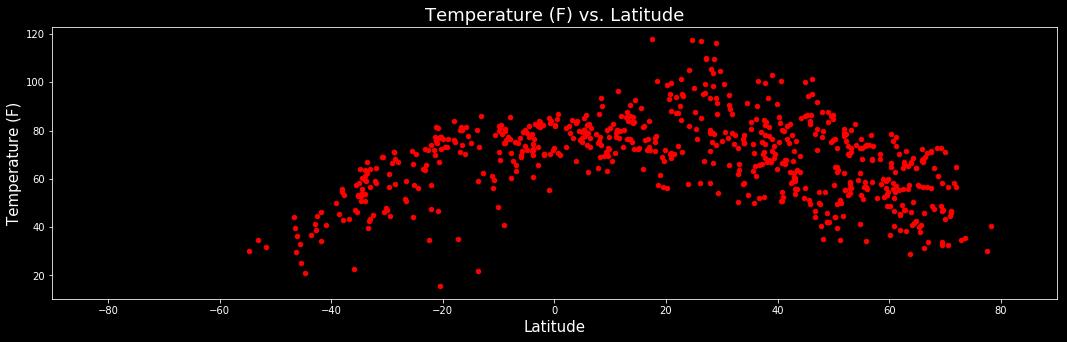

In [41]:
#Temperature (F) vs. Latitude

df_countries2.groupby(['Latitude'])['Temperature (F)'].mean().reset_index().style.background_gradient(cmap=cm)
plt.style.use('dark_background')
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Temperature (F)'],color = 'red',s=20)
plt.title('Temperature (F) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Temperature (F)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));


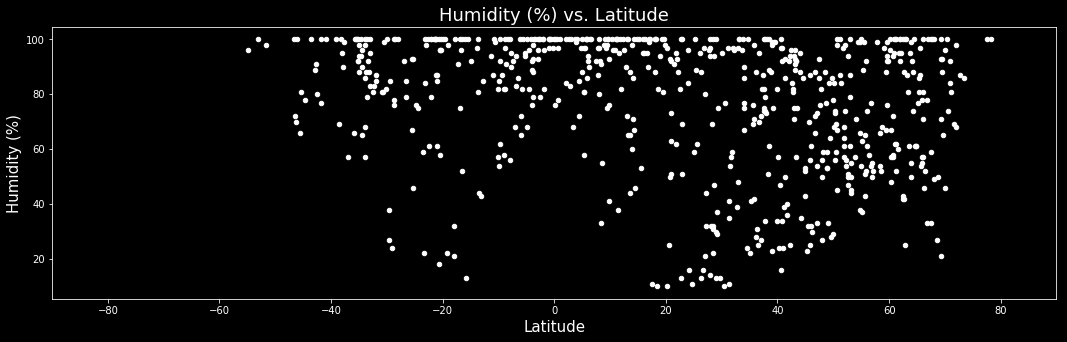

In [42]:
#Humidity (%) vs. Latitude

df_countries2.groupby(['Latitude'])['Humidity (%)'].mean().reset_index().style.background_gradient(cmap=cm)
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Humidity (%)'],color = 'white',s=20);
plt.title('Humidity (%) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Humidity (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));


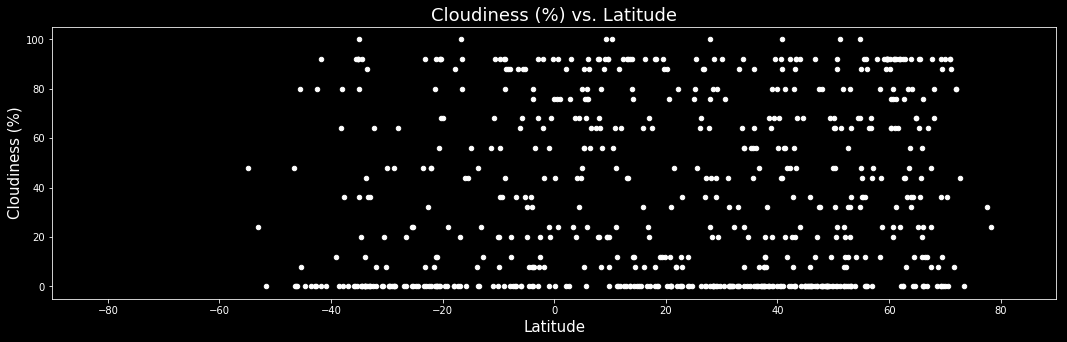

In [43]:
#Cloudiness (%) vs. Latitude

df_countries2.groupby(['Latitude'])['Cloudiness (%)'].mean().reset_index().style.background_gradient(cmap=cm)
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Cloudiness (%)'],color = 'w',s=20);
plt.title('Cloudiness (%) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Cloudiness (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));


The average wind speed is 7.976596385542168 mph for all randomly selected cities


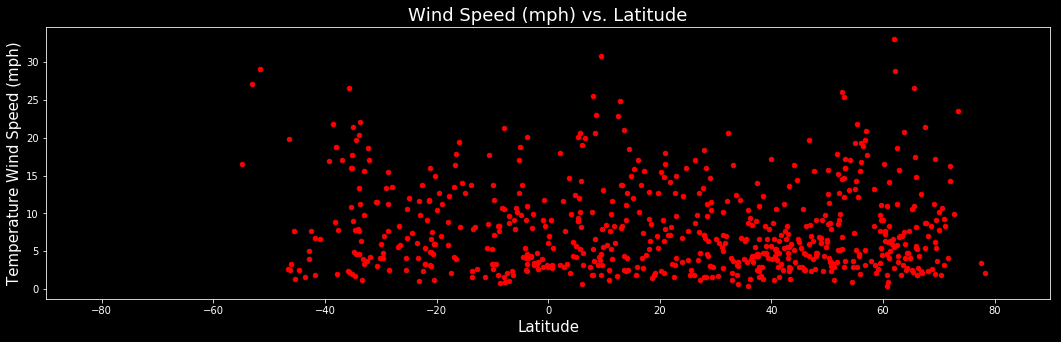

In [44]:

df_countries2.groupby(['Latitude'])['Wind Speed (mph)'].mean().reset_index().style.background_gradient(cmap=cm)
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Wind Speed (mph)'],color = 'red',s=20);
plt.xlim(-90,90)
plt.title('Wind Speed (mph) vs. Latitude',fontsize=(18));
plt.ylabel('Temperature Wind Speed (mph)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));
print("The average wind speed is {} mph for all randomly selected cities".format(df_countries['Wind Speed (mph)'].mean()))
